<font size=4> Добрый день, Полина! Меня зовут Алан, будем обмениваться с тобой опытом для успешного прохождения задания! Если не против, предлагаю общаться на ты (иначе дай знать, и перейдем на «вы»). Свои рекомендации буду оформлять в виде комментариев в Markdown ячейках:<br><strong>
    <li> <font color='red'> «❌ красный цвет» </font> – важно исправить или внести пояснения
    <li> <font color='orange'> «⚠️желтый цвет» </font>  – учесть, но можно не исправлять
    <li> <font color='green'> «✔️ зеленый цвет» </font> – все отлично, плюс альтернативные пути решения задачи
    <li>   <font color='steelblue'>«синий цвет» </font> - просто текст комментария
     </strong>
<br> В скобках буду указывать версию комментария. Прошу при внесении правок мои комментарии не удалять, а свои писать в соседних ячейках и выделять удобным цветом. Так коммуникация будет проходить эффективнее 👍.<br>
</font>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from numpy.random import RandomState

from sklearn.pipeline import Pipeline

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
random.seed(RANDOM_STATE)

In [3]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv',sep=',',decimal=".")
geo_data_0.info()
display(geo_data_0.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv',sep=',',decimal=".")
geo_data_1.info()
display(geo_data_1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv',sep=',',decimal=".")
geo_data_2.info()
display(geo_data_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Мы загрузили данные из 3 таблиц, заметили, что количество строк в таблицах одинаковое, формат столбцов и названия столбцов выглядят адекватно

Проверим наличие дубликатов в таблицах:

In [6]:
display(geo_data_0.duplicated().sum())
display(geo_data_1.duplicated().sum())
display(geo_data_2.duplicated().sum())

0

0

0

Посмотрим общую информацию о таблицах:

In [7]:
display(geo_data_0.describe())
display(geo_data_1.describe())
display(geo_data_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


удалим столбец id:

<div class='alert alert-success'> ✔️ Хорошо, провела первичный анализ. Добавлю, что в колонке id имеются дубли, однако в этой задаче это не принципиально.
</div>

Визуализируем распределение данных:

In [8]:
def plot_histograms_boxplots(df):
    """
    Строит гистограммы и ящики с усами для каждого количественного фактора в DataFrame.

    :param df: DataFrame, содержащий данные
    """
    # Выбор числовых столбцов
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Установка размера фигуры
    num_plots = len(numeric_cols)
    plt.figure(figsize=(10, 5 * num_plots))

    # Построение гистограмм и ящиков с усами для каждого числового столбца
    for i, col in enumerate(numeric_cols):
        # Гистограмма
        plt.subplot(num_plots, 2, 2*i + 1)
        df[col].hist(bins=15)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Ящик с усами
        plt.subplot(num_plots, 2, 2*i + 2)
        df.boxplot(column=col)
        plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

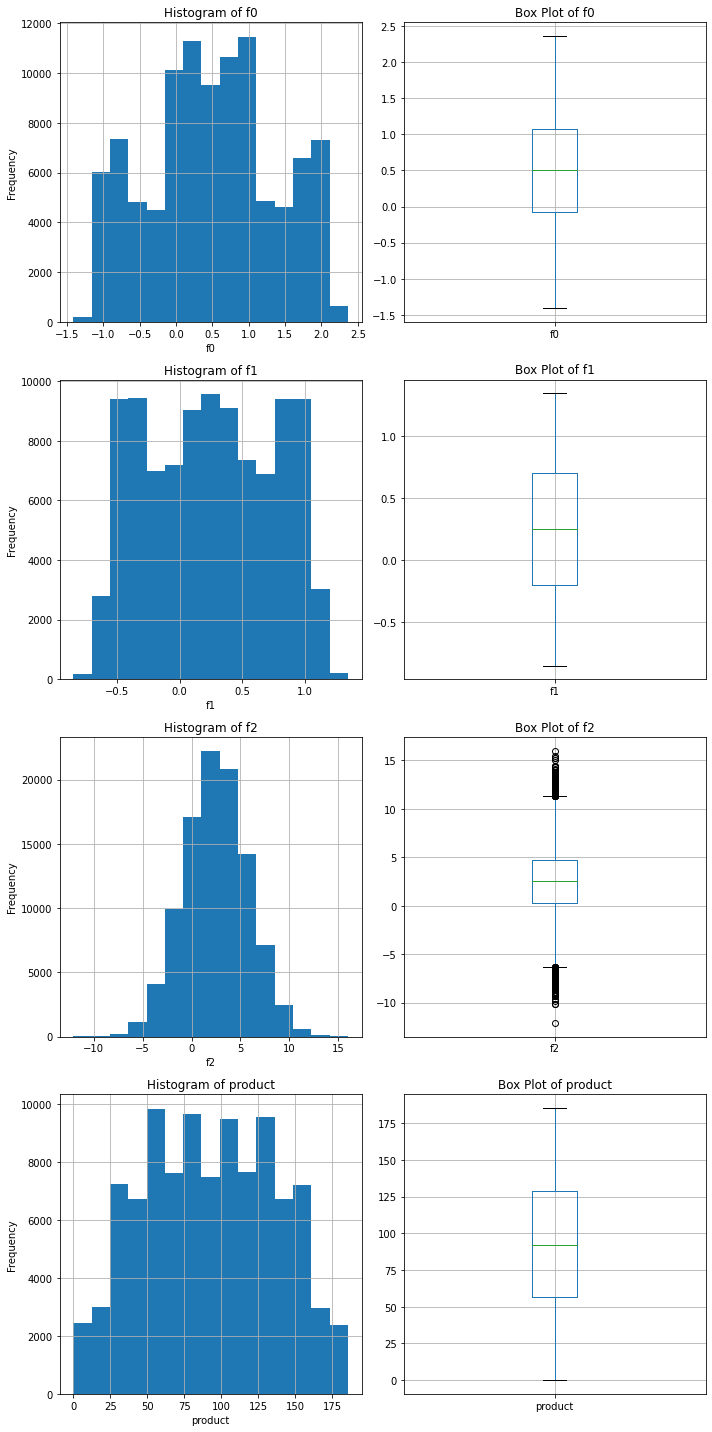

In [9]:
plot_histograms_boxplots(geo_data_0)

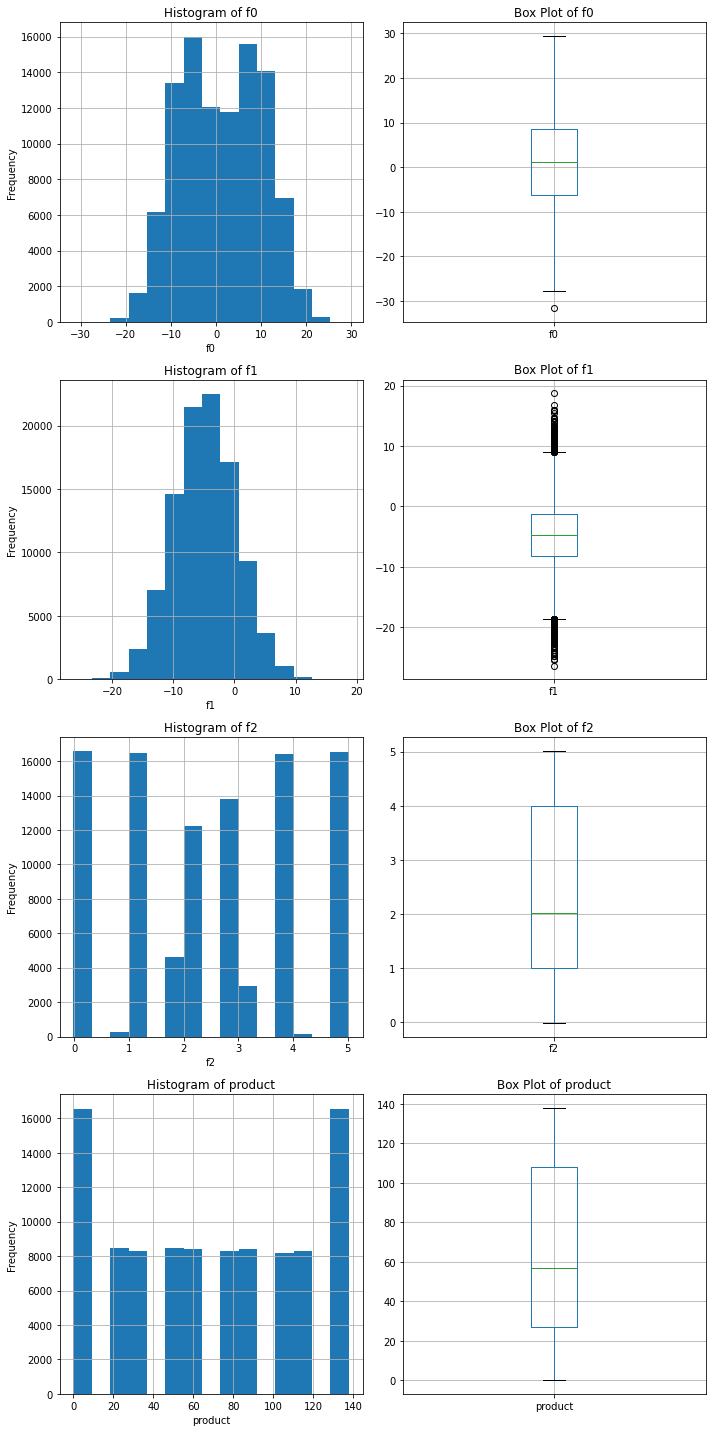

In [10]:
plot_histograms_boxplots(geo_data_1)

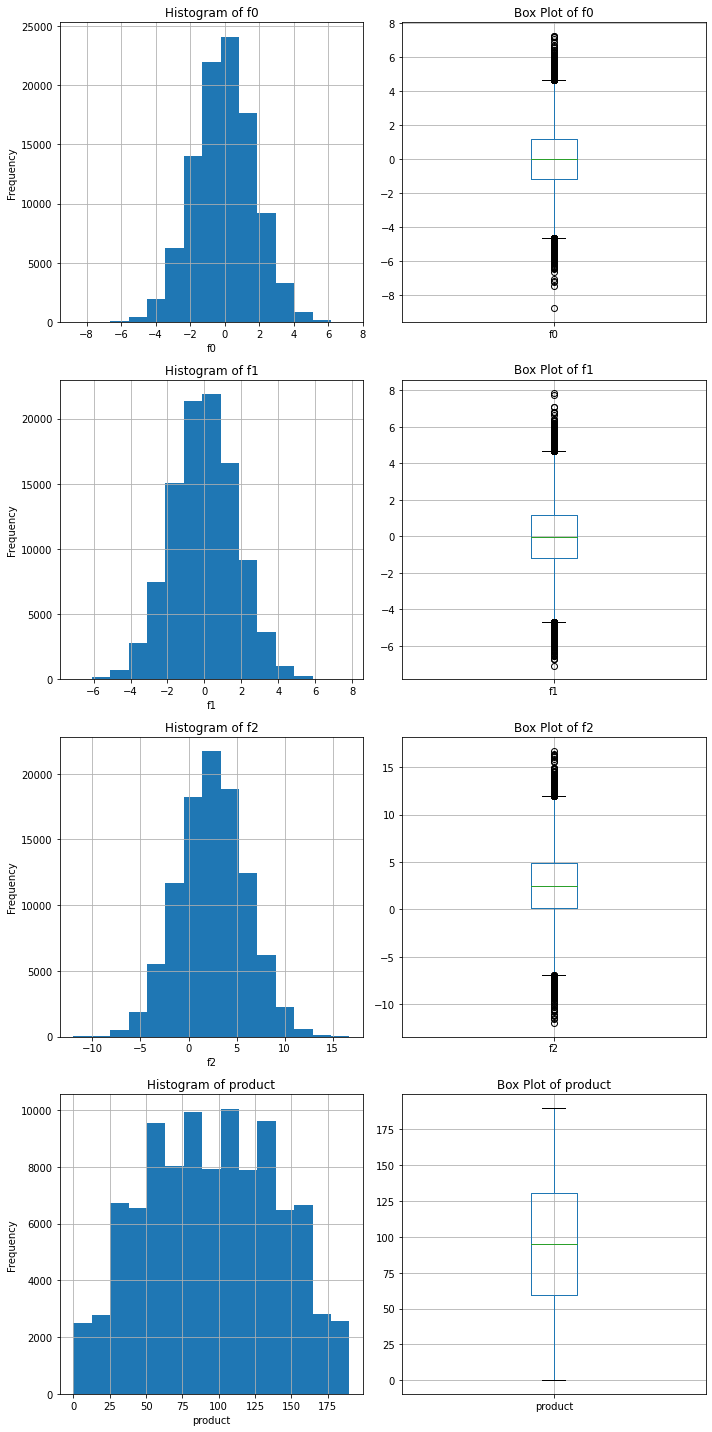

In [11]:
plot_histograms_boxplots(geo_data_2)

Явных выбросов в данных не наблюдается

<div class='alert alert-success'> ✔️Хорошая функция для изучения распределений. Можно отметить тут интересный характер распределения этого признака и цели во втором по счету регионе
</div>

Посмотрим корреляцию между признаками в таблицах:

In [12]:
geo_data_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [13]:
geo_data_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [14]:
geo_data_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Вывод: заметили мультиколлинеарность в таблице 1 между f2 и целевым признаком, следовательно, признак f2 следует удалить для целей обучения модели.

<div class='alert alert-danger'>❌Мултиколлинеарность между признаками плохо, да, однако между целью и признаком, наоборот, он он пригодится


</div>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Вернула признак)
</div> 

<div class='alert alert-success'> ✔️(2)Отлично
</div>

Вывод: мы убедились в отсутствии пропусков и дубликатов, проверили формат данных, названия столбцов, отсутствие значительных выбросов. Также заметили мультиколлинеарность в 1 таблице.

## Обучение и проверка модели

In [15]:
array_name = ["geo_data_0",
              "geo_data_1",
              "geo_data_2"]

array_frame = [geo_data_0,
              geo_data_1,
              geo_data_2]

data = {"pipelines":{},"scores":{},"valid":{}}

for frame, name in zip(array_frame,array_name):
    
    features = frame.drop(["id","product"], axis = 1)
    target = frame["product"]
    
    new_pipeline = make_pipeline(StandardScaler(),LinearRegression())
    
    
    (features_train,
    features_valid,
    target_train,
    target_valid) = train_test_split(features,
                                     target,
                                     test_size = 0.25,
                                     random_state = RANDOM_STATE)
    data['valid'][name] = (features_valid,target_valid)
    new_pipeline.fit(features_train,target_train)
    
    data['pipelines'][name] = new_pipeline
    data['scores'][name] = mean_squared_error(target_valid,
                                                   new_pipeline.predict(features_valid))**0.5

In [16]:
for name in array_name:
    best_model = data['pipelines'][name]
    predicted_values = best_model.predict(data['valid'][name][0])
    RMSE_model = (mean_squared_error(data['valid'][name][1],predicted_values))**0.5
    print(name)
    print('Средний запас:',predicted_values.mean(),"RMSE модели:",RMSE_model)
    print()

geo_data_0
Средний запас: 92.39879990657768 RMSE модели: 37.75660035026169

geo_data_1
Средний запас: 68.7128780391376 RMSE модели: 0.8902801001028846

geo_data_2
Средний запас: 94.77102387765939 RMSE модели: 40.145872311342174



Вывод: самая маленькая ошибка наблюдается в 1 регионе, но при этом наибольший объем запасов в 2 регионе.

<div class='alert alert-success'> ✔️Молодец, что используешь циклы для оптимизации кода, однако результат и вывод поменяется после восстановления признака нашего
</div>

## Подготовка к расчёту прибыли

In [17]:
BUDGET = 10**10
PRE_POINTS = 500
FINAL_POINTS = 200
PRICE = 450000
LOSS_THRESHOLD =  0.025
BREAK_EVEN = (BUDGET/(PRICE))/(FINAL_POINTS)

<div class='alert alert-success'> ✔️Молодец, написанные с больших букв константы проще отличаются от переменных
</div>

In [18]:
print("Точка безубыточности:",round(BREAK_EVEN,2))

Точка безубыточности: 111.11


In [19]:
for frame in array_frame:
    percent = (frame.loc[frame['product'] > 111.11]['product'].count()/frame['product'].count())*100
    print(percent)

36.584
16.537
38.178


Вывод: В нулевом и третьем регионах более 35% всех точек проходят порог безубыточности, в то время как в первом регионе только 17% точек проходят порог.

<div class='alert alert-success'> ✔️Обьем добычи для безубыточности с одной скважины найден. Хорошее сравнение с запасами в регионах
</div>

## Расчёт прибыли и рисков 

In [20]:
def income(true_target, pred_target):
    sort_Series = pd.Series(pred_target).sort_values(ascending=False)
    true_target_sort = true_target[sort_Series.index][:FINAL_POINTS]
    sum_true = true_target_sort.sum() 
    return round((sum_true * PRICE) - BUDGET,2)

<div class='alert alert-success'> ✔️Корректная функция
</div>

In [21]:
for name in array_name:
    best_model = data['pipelines'][name]
    predicted_values = best_model.predict(data['valid'][name][0])
    predicted_values = pd.Series(predicted_values)
    income_0 = data['valid'][name][1].reset_index(drop = True)
    print(name)
    print('Прибыль:',income(income_0,predicted_values))
    print()

geo_data_0
Прибыль: 3359141114.46

geo_data_1
Прибыль: 2415086696.68

geo_data_2
Прибыль: 2598571759.37



In [24]:
state = np.random.RandomState(12345)
def confidence_interval(true_target,pred_target):
    samples = []
    true_target = true_target.reset_index(drop = True)
    for i in range(1000):
        sample = true_target.sample(n = PRE_POINTS, replace=True,random_state=state)
        probs_subsample = pred_target[sample.index]
        samples.append(income(sample.reset_index(drop=True), probs_subsample.reset_index(drop=True)))
    samples = pd.Series(samples)
    print(samples.mean())
    print(samples.apply(lambda x: x < 0).sum()/len(samples)*100,"%")
    
    lower = samples.quantile(0.025)
    upper = samples.quantile(0.975)
    return round(lower,2), round(upper,2)

<div class='alert alert-warning'>⚠️ Логика верная. Как считаешь, не лучше в функцию прибыли передавать аргументы со сброшенными индексами  (sample.reset_index(drop=True), probs_subsample.reset_index(drop=True))? Это обеспечит недопущение попадания искусственных повторов при подсчете прибыли, в выборку из 200 точек (читай <a href='https://zen.yandex.ru/media/id/5ee6f73b7cadb75a66e4c7e3/lovushka-semlirovaniia-privodiascaia-k-razmnojeniiu-povtornyh-indeksov-62d25c205f37c21646e36711'> тут </a>).

</div>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Добавила в функцию сброс индексов
</div> 

<div class='alert alert-success'> ✔️(2)Супер
</div>

In [25]:
predicted = pd.DataFrame()
for name in array_name:
    best_model = data['pipelines'][name]
    predicted_values = best_model.predict(data['valid'][name][0])
    predicted[name]=pd.Series(predicted_values)
    print(name)
    print('95% доверительный итервал:',confidence_interval(data['valid'][name][1],predicted[name]))
    print()

geo_data_0
406278783.42436
6.7 %
95% доверительный итервал: (-117742136.49, 911737050.75)

geo_data_1
441504277.59207994
1.6 %
95% доверительный итервал: (35728489.28, 828006639.0)

geo_data_2
385213195.91423005
7.8 %
95% доверительный итервал: (-164785166.11, 888206234.2)



Вывод: наименьшие риски наблюдаются в 1 регионе, наибольшая прибыль также для 1 региона. При этом риски соответствувют целевому значению менее 2.5% только для первого региона, поэтому рассматриваем только его. Для региона 0 наблюдаются более повышенные риски - 6.2%, при меньшей прибыли. Для 2 региона риски еще выше - 8.7%, при меньшей прибыли. Таким образом, рекомендуется выбрать 1 регион для разведки новых месторождений.

<div class='alert alert-danger'>❌тут вывод поменяется у нас
</div>

<div class='alert alert-success'> ✔️(2)Отличный выбор региона
</div>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Переписала вывод по новым значениям
</div> 

<div class='alert alert-info'>🏁 Отличная работа, Полина!  Качественно исследовала и подготовила признаки, корректно выполнила разделение на выборки и построила регрессию. Осталось вернуть значимый признак и переделать выводы в части касающейся.

</div>

<div class='alert alert-success'> <strong>Ревьюер(2)</strong> <br>

Спасибо за сильную работу и удачной учебы, немного активности и все получится!

</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован